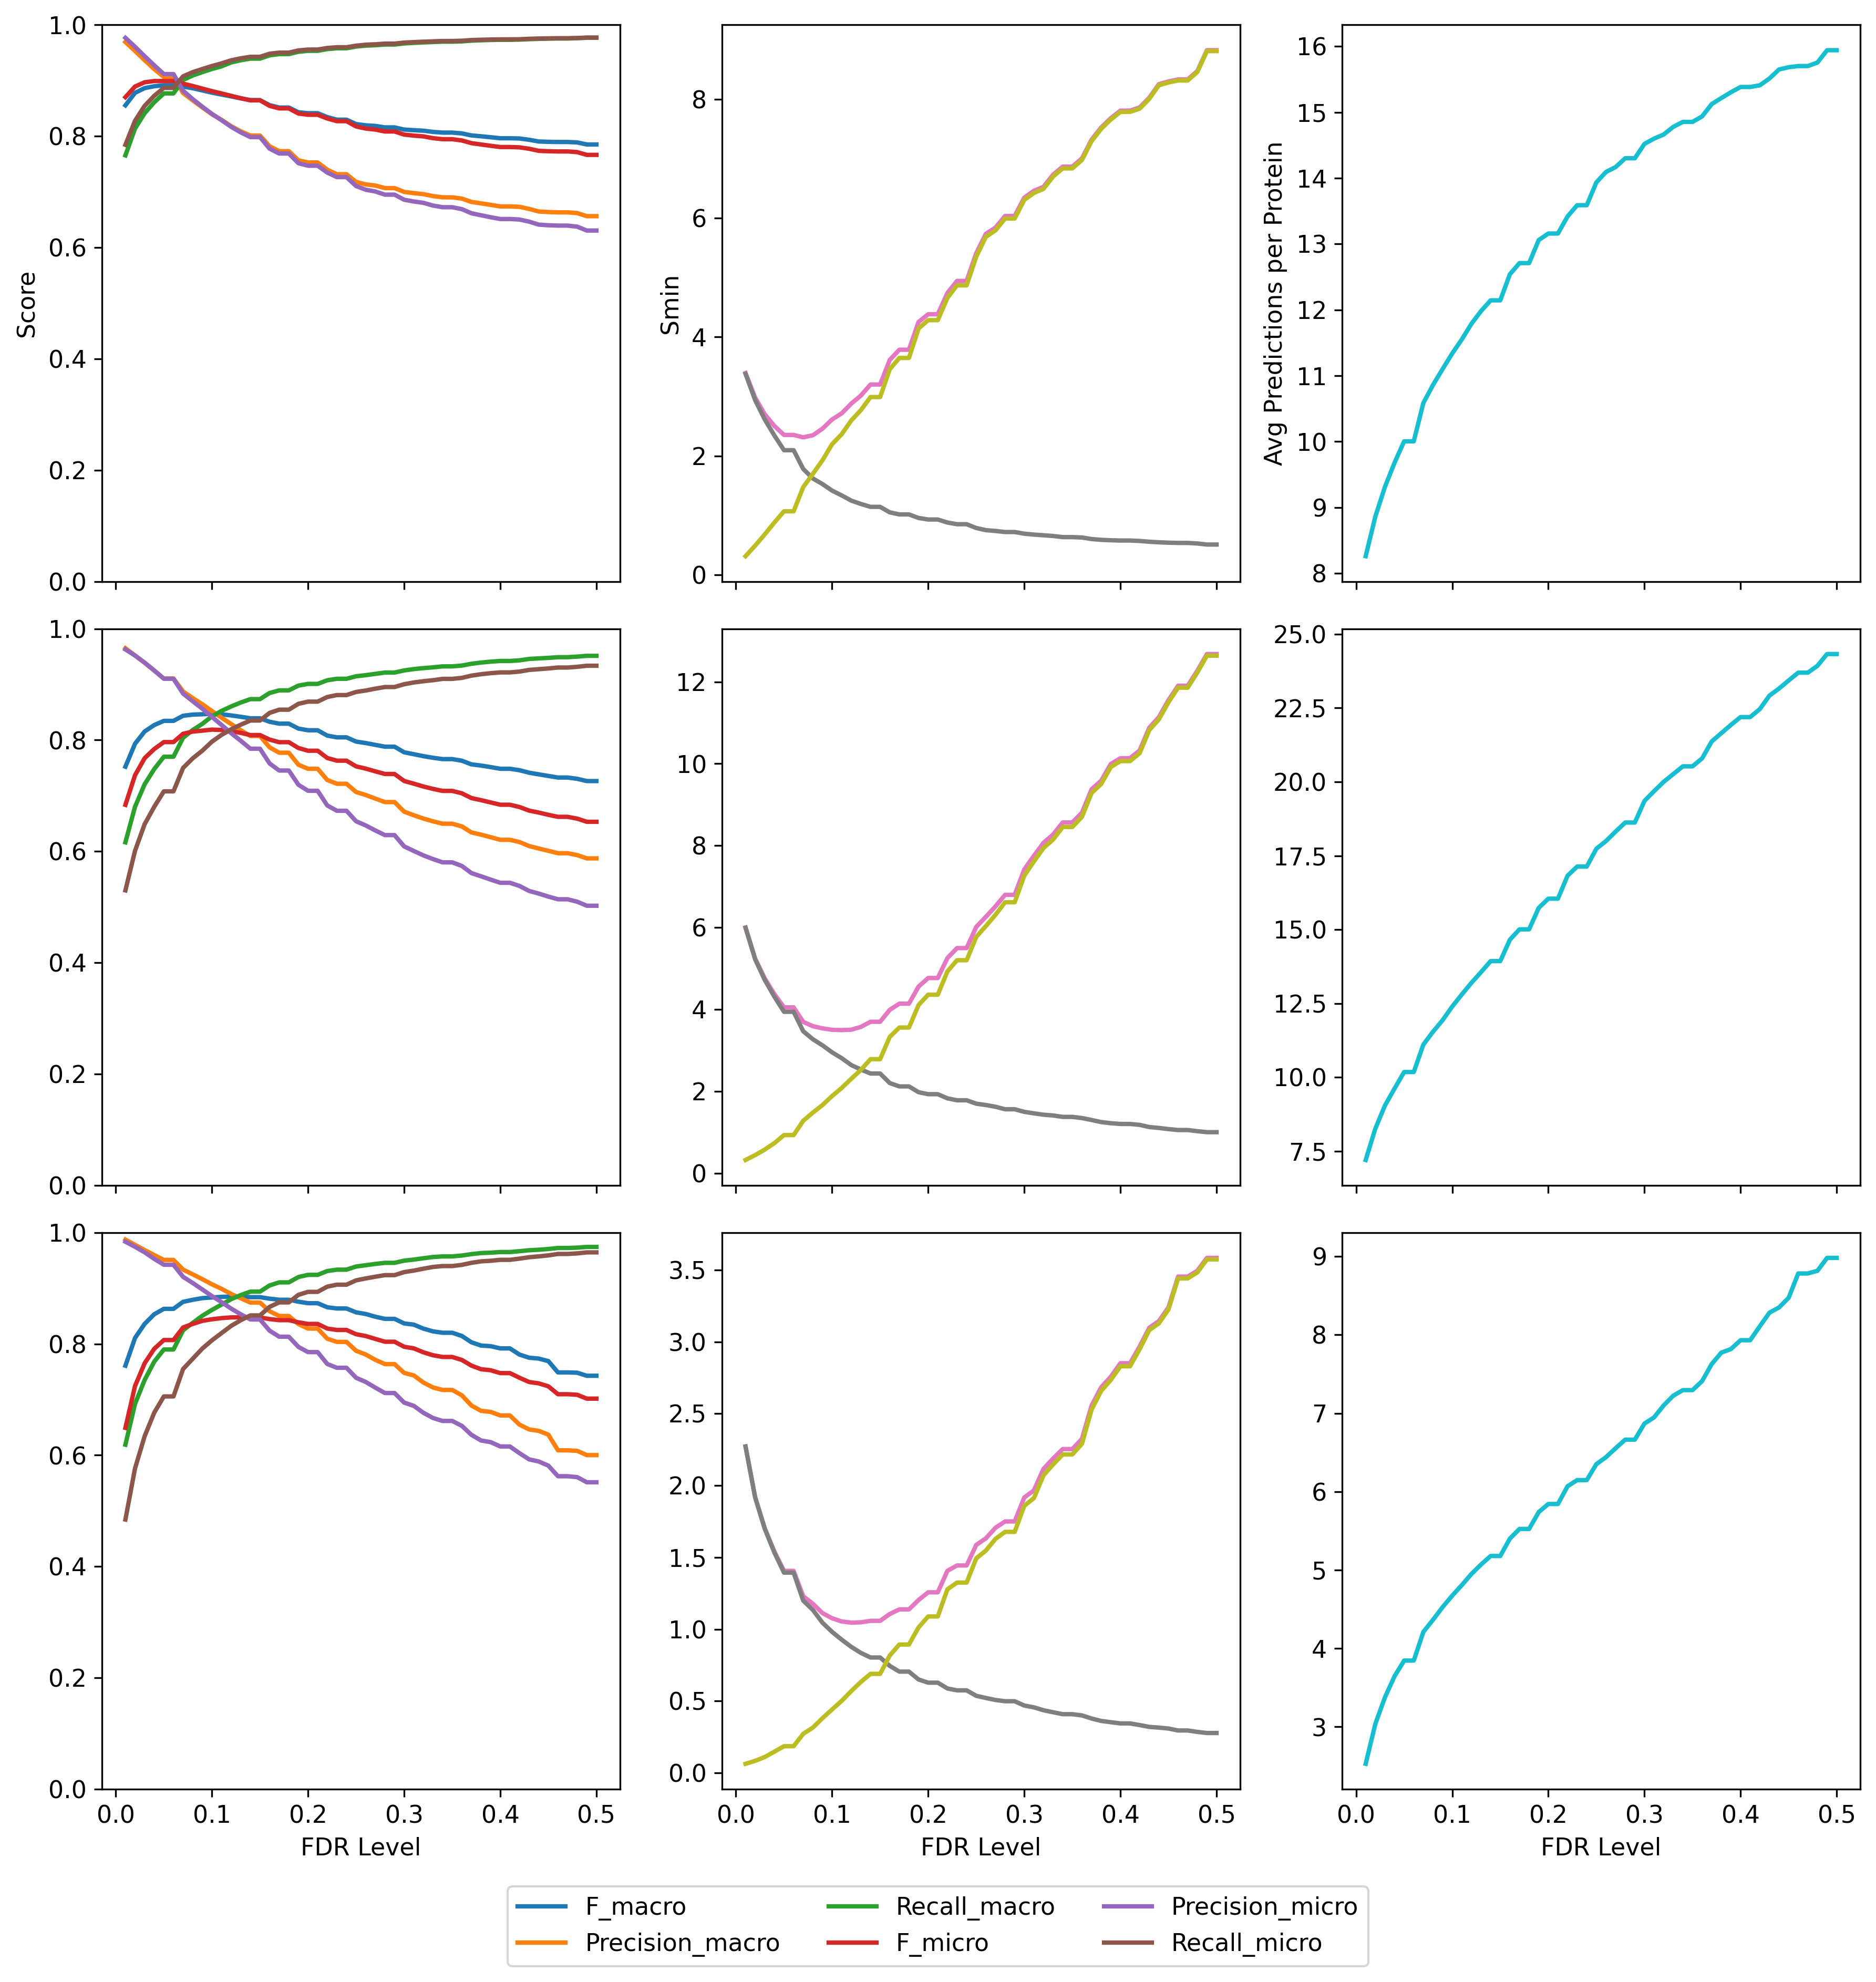

In [7]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Load the FDR threshold metrics for all three ontologies
mf_data = pd.read_csv('function_test_predictions_and_FDR/fdr_threshold_metrics_all_ontologies.csv')
bp_data = pd.read_csv('process_test_predictions_and_FDR/fdr_threshold_metrics_all_ontologies.csv')
cc_data = pd.read_csv('component_test_predictions_and_FDR/fdr_threshold_metrics_all_ontologies.csv')

# Create figure with 3x3 subplots (3 ontologies x 3 metric groups)
fig, axes = plt.subplots(3, 3, figsize=(12, 12), dpi=300, sharex=True)

# Data and ontology names
data_dict = {'MF': mf_data, 'BP': bp_data, 'CC': cc_data}
ontology_names = ['MF', 'BP', 'CC']

# Define colors for different metrics
colors = {
    'f_macro': '#1f77b4',      # blue
    'precision_macro': '#ff7f0e',  # orange
    'recall_macro': '#2ca02c',     # green
    'f_micro': '#d62728',      # red
    'precision_micro': '#9467bd',  # purple
    'recall_micro': '#8c564b',     # brown
    's_min': '#e377c2',        # pink
    'remaining_uncertainty': '#7f7f7f',  # gray
    'misinformation': '#bcbd22',   # olive
    'avg_predictions_per_protein': '#17becf'  # cyan
}

# Plot for each ontology
for ontology_idx, (ontology, data) in enumerate(data_dict.items()):
    fdr_levels = data['fdr_level']
    
    # Column 1: Macro/Micro metrics
    ax = axes[ontology_idx, 0]
    ax.plot(fdr_levels, data['f_macro'], color=colors['f_macro'], linewidth=2, label='F_macro')
    ax.plot(fdr_levels, data['precision_macro'], color=colors['precision_macro'], linewidth=2, label='Precision_macro')
    ax.plot(fdr_levels, data['recall_macro'], color=colors['recall_macro'], linewidth=2, label='Recall_macro')
    ax.plot(fdr_levels, data['f_micro'], color=colors['f_micro'], linewidth=2, label='F_micro')
    ax.plot(fdr_levels, data['precision_micro'], color=colors['precision_micro'], linewidth=2, label='Precision_micro')
    ax.plot(fdr_levels, data['recall_micro'], color=colors['recall_micro'], linewidth=2, label='Recall_micro')
    
    # Only show x-axis label on bottom row
    if ontology_idx == len(data_dict) - 1:
        ax.set_xlabel('FDR Level', fontsize=11)
    
    if ontology_idx == 0:
        ax.set_ylabel('Score', fontsize=11)
    
    ax.tick_params(axis='both', which='major', labelsize=11)
    ax.set_ylim(0, 1)
    
    # Column 2: Uncertainty metrics
    ax = axes[ontology_idx, 1]
    ax.plot(fdr_levels, data['s_min'], color=colors['s_min'], linewidth=2, label='s_min')
    ax.plot(fdr_levels, data['remaining_uncertainty'], color=colors['remaining_uncertainty'], linewidth=2, label='Remaining Uncertainty')
    ax.plot(fdr_levels, data['misinformation'], color=colors['misinformation'], linewidth=2, label='Misinformation')
    
    # Only show x-axis label on bottom row
    if ontology_idx == len(data_dict) - 1:
        ax.set_xlabel('FDR Level', fontsize=11)
    
    if ontology_idx == 0:
        ax.set_ylabel('Smin', fontsize=11)
    
    ax.tick_params(axis='both', which='major', labelsize=11)
    
    # Column 3: Prediction metrics
    ax = axes[ontology_idx, 2]
    ax.plot(fdr_levels, data['avg_predictions_per_protein'], color=colors['avg_predictions_per_protein'], linewidth=2, label='Avg Predictions per Protein')
    
    # Only show x-axis label on bottom row
    if ontology_idx == len(data_dict) - 1:
        ax.set_xlabel('FDR Level', fontsize=11)
    
    if ontology_idx == 0:
        ax.set_ylabel('Avg Predictions per Protein', fontsize=11)
    
    ax.tick_params(axis='both', which='major', labelsize=11)

# Create global legend at the bottom
handles, labels = axes[0, 0].get_legend_handles_labels()
fig.legend(handles, labels, loc='lower center', bbox_to_anchor=(0.5, -0.05), 
          ncol=3, fontsize=11, frameon=True)

plt.tight_layout()
plt.subplots_adjust(bottom=0.05)  # Make room for legend
plt.show()